# *과적합을 막는 방법*

학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어트리는 주요 이슈<br>
모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, <b>검증 데이터나 테스트 데이터(새로운 데이터)에 대해서는 제대로 작동하지 않음</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;→ 모델이 학습 데이터를 불필요할 정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태<br>

# 

## *데이터 양 늘리기*

데이터가 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하게 되므로 과적합 현상이 발생할 확률이 늘어남<br>
데이터 양이 늘어날수록, 모델은 데이터의 일반적인 패턴을 학습하여 과적합 방지<br><br>
<b>Data Augmentation</b><br>
기존 데이터를 조금씩 변형하고 추가하여 데이터 양을 늘림

# 

## *모델 복잡도 줄이기*

In [2]:
import torch.nn as nn

In [10]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.relu = nnReLU()
    self.fc3 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

class Architecture2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture2, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

Architecture1 인공 신경망 모델은 3개의 선형 레이어(Linear)을 지니고 있다.<br>
Architecture1에서 과적합을 보인다면 <b>2개의 선형 레이어(Linear)를 가지는 Architecture2 인공 신경망으로 복잡도를 줄일 수 있다</b><br><br>
### 인공 신경망에서 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)라고 함

# 

# *가중치 규제 적용*

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높다<br>
간단한 모델은 적은 수의 매개변수를 가진 모델<br><br>
복잡한 모델을 좀 더 간단하게 하는 방법으로 <b>가중치 규제(Regularization)</b>가 있다

<b>L1 규제</b> : 가중치 w들의 절대값 합계를 비용 함수에 추가. L1 노름이라고도 함<br>
<b>L2 규제</b> : 모든 가중치 w들의 제곱합을 비용 함수에 추가. L2 노름이라고도 함

<b>L2 규제</b>는 <b>L1 규제</b>와 달리 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기보다는 0에 가까워지는 경향<br>
L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용<br><br>

### L2 규제 사용 권장
Pytorch에서 optimizer의 <b>weight_decay</b> 매개변수 설정하면서 L2 규제 적용

In [4]:
import torch

In [11]:
model = Architecture2(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

In [14]:
print(model)
print("--------------------------------------------------------------------------------------------")
print(optimizer)

Architecture2(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)
--------------------------------------------------------------------------------------------
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
)


# 

# *Dropout*

드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법<br>
예를 들어 드롭아웃의 비율을 0.5로 하면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만 사용함<br><br>
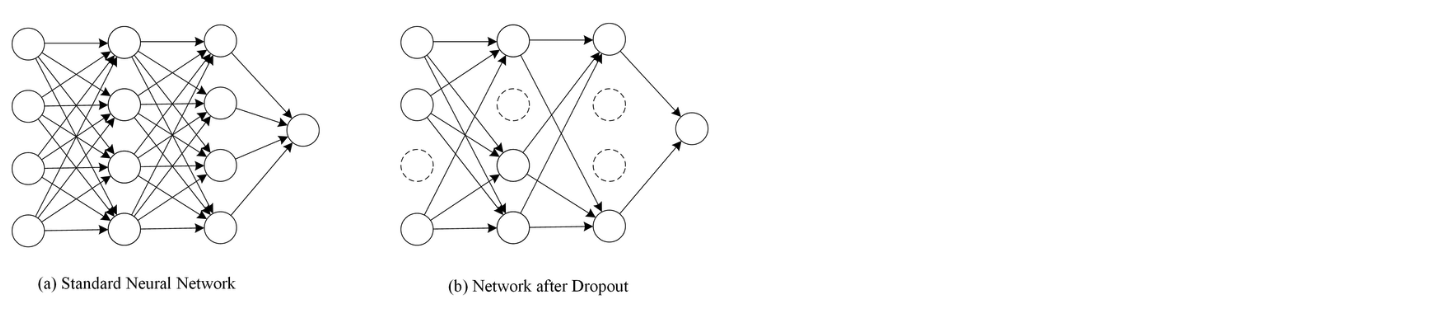
드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는다<br>
학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지<br>
매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 <b>서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합 방지</b>